In [68]:
# other imports

import tensorflow as tf

from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization, LeakyReLU, ReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.initializers import HeUniform

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler

###1. Data import and Understanding 

In [19]:
# basic imports 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [20]:
# read the data

df = pd.read_csv('/content/drive/MyDrive/greatlearning/NNDL project/Signal.csv')

df.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [22]:
df.shape

(1599, 12)

In [23]:
# check for missing values

df.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [24]:
# check for duplicate entries

df[df.duplicated()].shape

(240, 12)

In [25]:
df.drop_duplicates(inplace=True)

In [26]:
df.shape

(1359, 12)

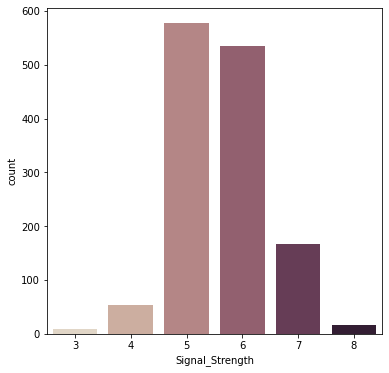

In [27]:
# visualize target

plt.figure(figsize=(6,6))

sns.countplot(data=df, x='Signal_Strength', palette='ch:.25')

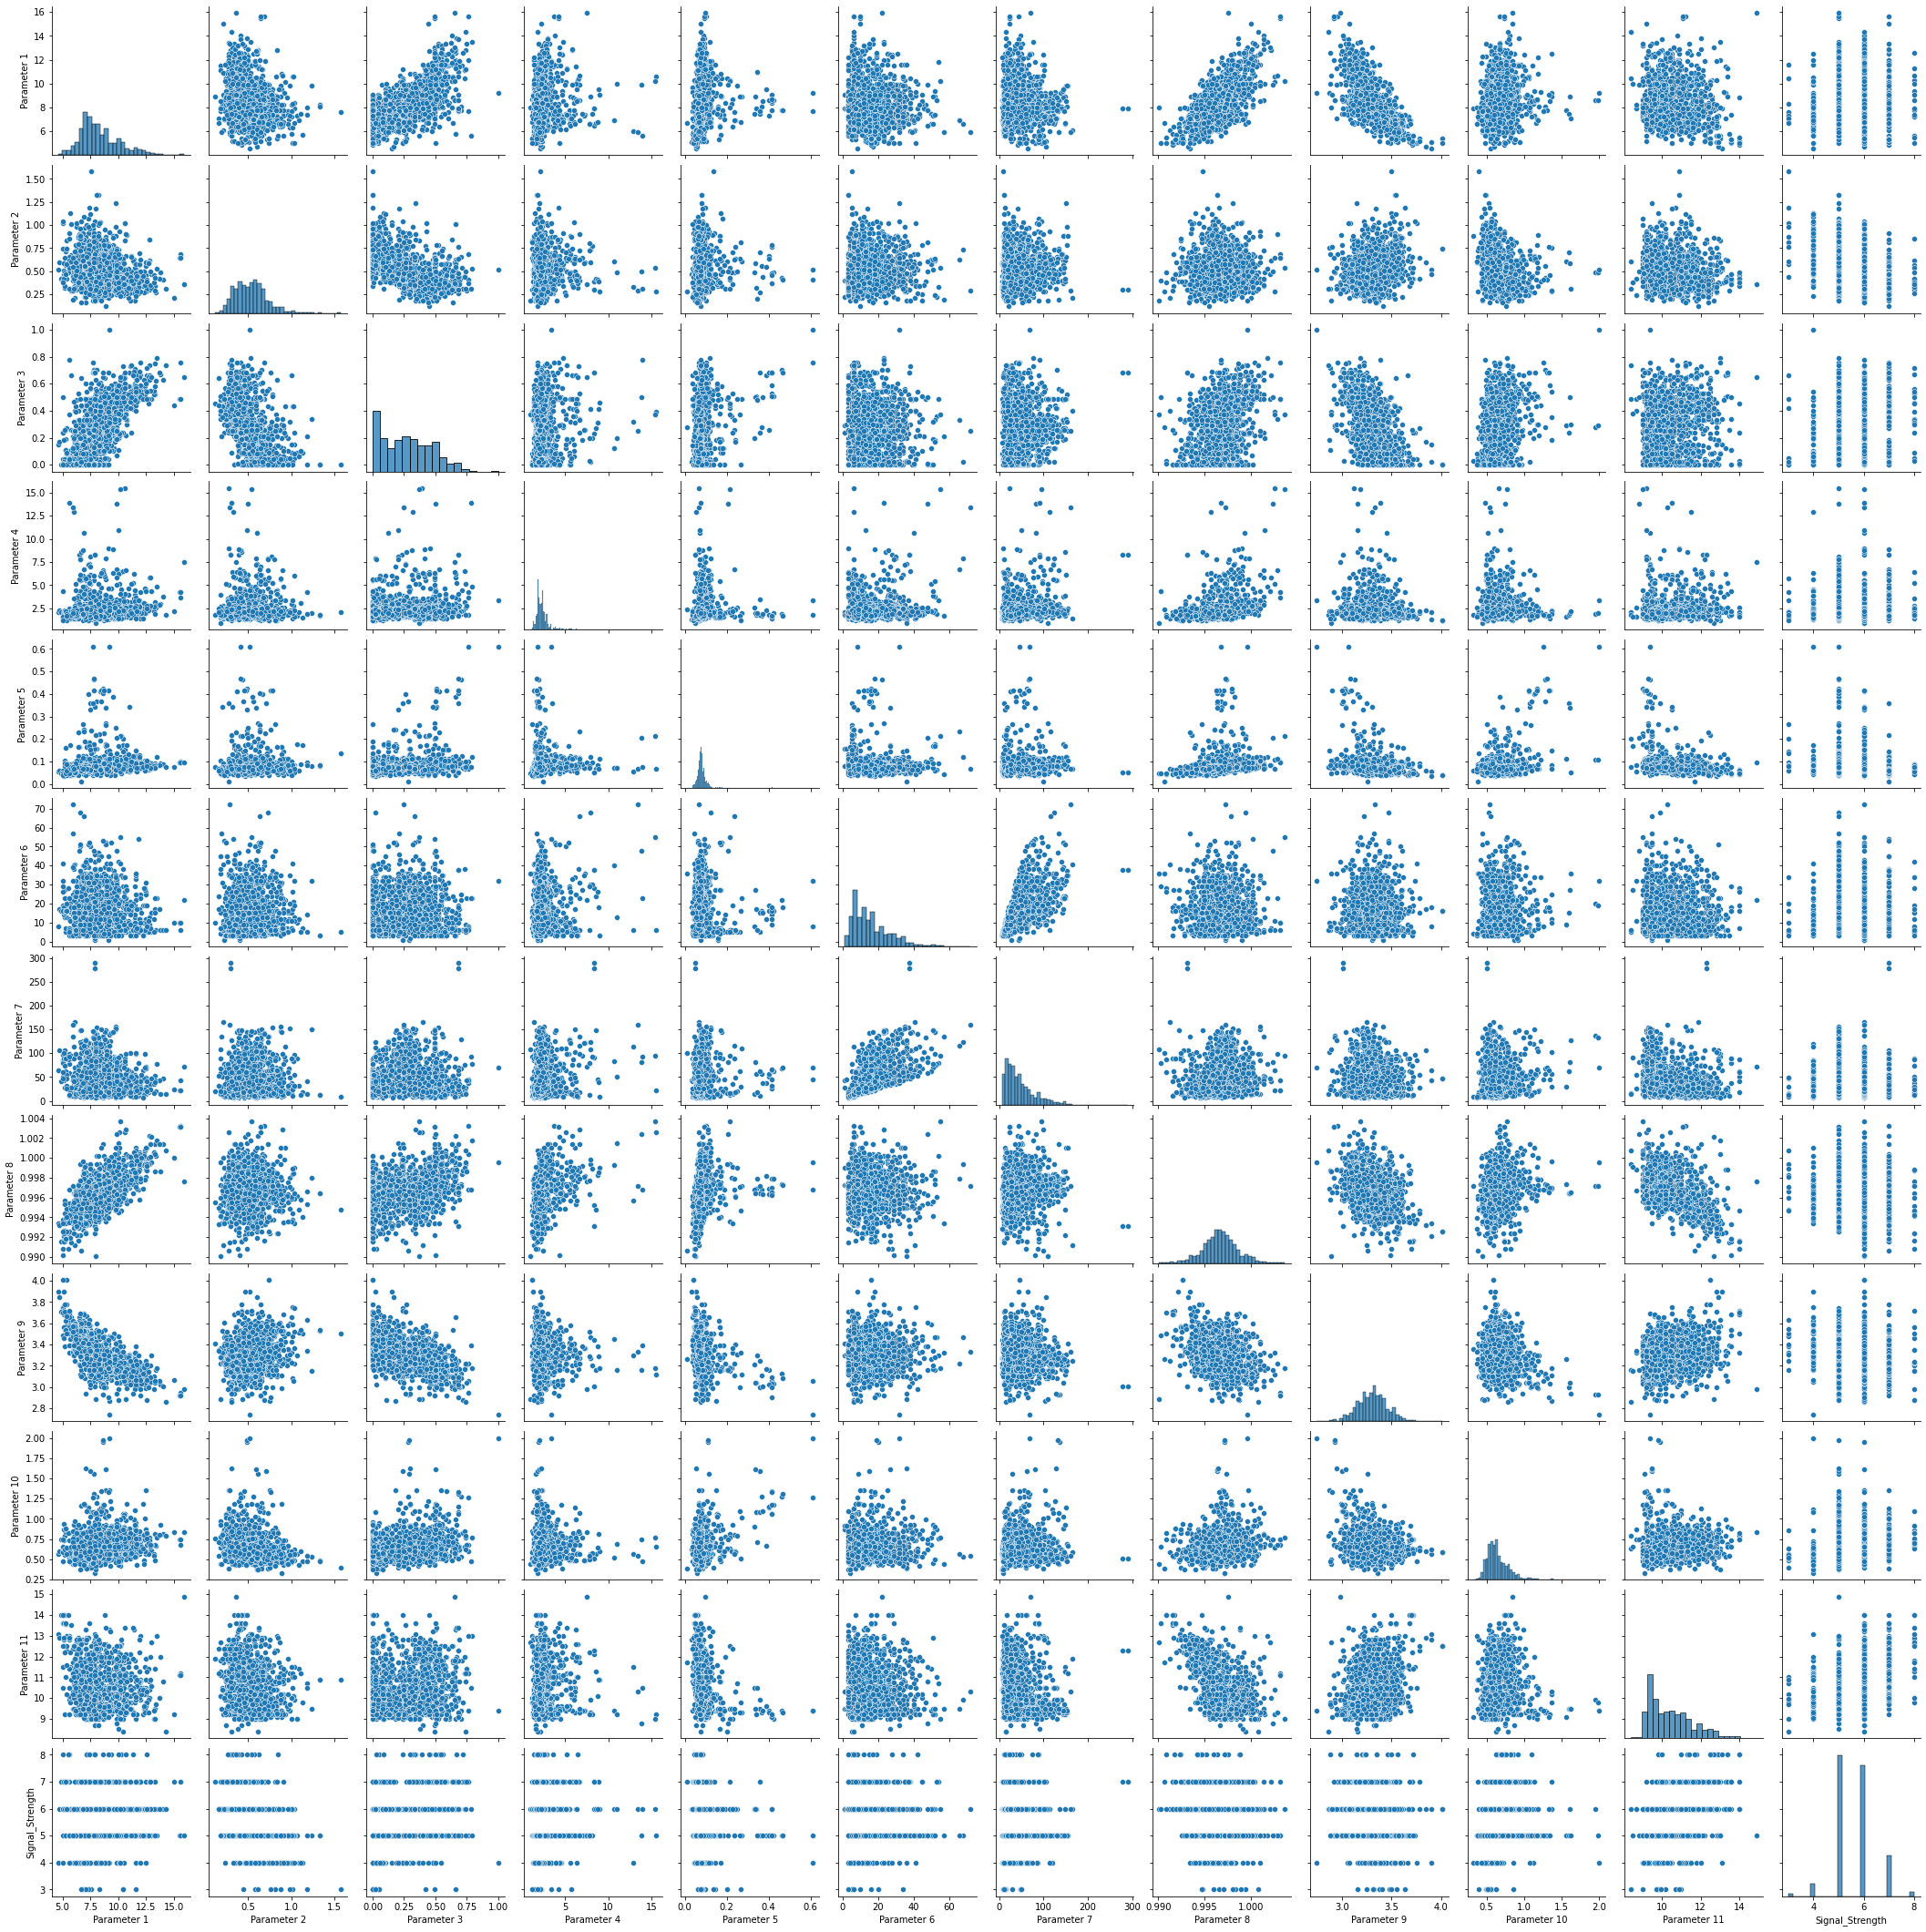

In [ ]:
sns.pairplot(data=df)

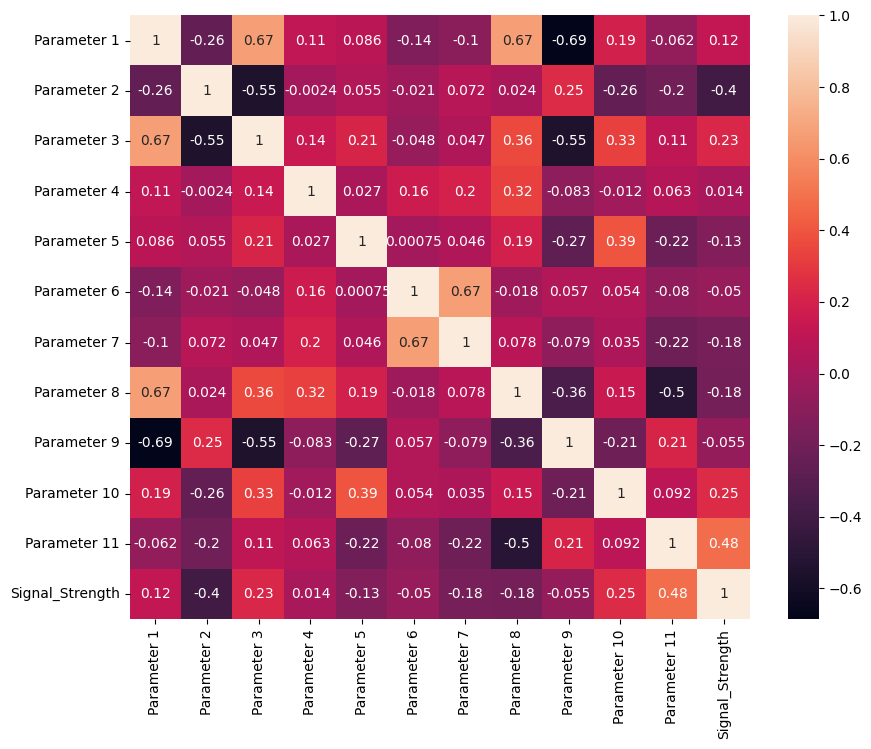

In [ ]:
plt.figure(figsize=(10,8), dpi=100)

sns.heatmap(df.corr(), annot=True)

Most of the the signal quality is above average. ie: 5, 6 & 7. 
Signal is excellent very few times. (8)
Signal is below average some times. (3 & 4)


### 2. Data Preprocessing

In [28]:
# split the data into X and Y

X = df.drop(columns=['Signal_Strength'])
y = df.Signal_Strength

In [73]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=105)

In [74]:
# print shape

print("X_train : ", X_train.shape)
print("y_train : ", y_train.shape)
print("X_test : ", X_test.shape)
print("y_test : ", y_test.shape)

X_train :  (951, 11)
y_train :  (951,)
X_test :  (408, 11)
y_test :  (408,)


In [75]:
y_train.value_counts()

5    391
6    376
7    123
4     40
8     14
3      7
Name: Signal_Strength, dtype: int64

In [77]:
y_test.value_counts()

5    186
6    159
7     44
4     13
8      3
3      3
Name: Signal_Strength, dtype: int64

In [78]:
# normalize the data

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [79]:
# transform labels as categories

y_train_enc = tf.keras.utils.to_categorical(y_train)
y_test_enc = tf.keras.utils.to_categorical(y_test)

In [80]:
y_train_enc[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

### Model Training & Evaluation using Neural Network

In [81]:
# design a neural network to train a classifier

model = Sequential()

model.add(Input(shape=11))

model.add(Dense(66, activation='relu'))

model.add(Dense(121, activation='relu'))

model.add(Dense(36, activation='relu'))

model.add(Dense(9 , activation='softmax'))



In [82]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 66)                792       
                                                                 
 dense_26 (Dense)            (None, 121)               8107      
                                                                 
 dense_27 (Dense)            (None, 36)                4392      
                                                                 
 dense_28 (Dense)            (None, 9)                 333       
                                                                 
Total params: 13,624
Trainable params: 13,624
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.layers

In [84]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [85]:
history = model.fit(X_train_scaled, y_train_enc, epochs=100, validation_data=(X_test_scaled, y_test_enc), verbose=1)

Epoch 1/100
30/30 [==============================] - 1s 11ms/step - loss: 2.0823 - accuracy: 0.3649 - val_loss: 1.8776 - val_accuracy: 0.4534
Epoch 2/100
30/30 [==============================] - 0s 6ms/step - loss: 1.8214 - accuracy: 0.3828 - val_loss: 1.6417 - val_accuracy: 0.4265
Epoch 3/100
30/30 [==============================] - 0s 6ms/step - loss: 1.6310 - accuracy: 0.3891 - val_loss: 1.4676 - val_accuracy: 0.4412
Epoch 4/100
30/30 [==============================] - 0s 6ms/step - loss: 1.5002 - accuracy: 0.4280 - val_loss: 1.3579 - val_accuracy: 0.4657
Epoch 5/100
30/30 [==============================] - 0s 5ms/step - loss: 1.4109 - accuracy: 0.4553 - val_loss: 1.2805 - val_accuracy: 0.4975
Epoch 6/100
30/30 [==============================] - 0s 6ms/step - loss: 1.3418 - accuracy: 0.4921 - val_loss: 1.2201 - val_accuracy: 0.5441
Epoch 7/100
30/30 [==============================] - 0s 7ms/step - loss: 1.2859 - accuracy: 0.5100 - val_loss: 1.1734 - val_accuracy: 0.5466
Epoch 8/100


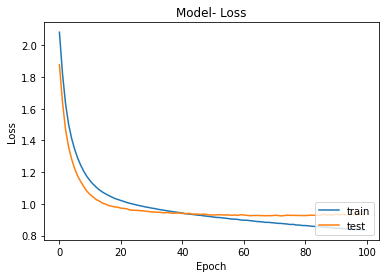

In [86]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model- Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')

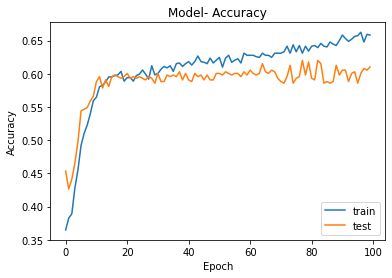

In [87]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model- Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')

In [101]:
model_v1 = Sequential()

model_v1.add(Input(shape=11))

model_v1.add(BatchNormalization())

model_v1.add(Dense(256, activation='relu', kernel_initializer=HeUniform(seed=7)))

model_v1.add(Dropout(0.15))

model_v1.add(Dense(128, activation='relu', kernel_initializer=HeUniform(seed=7)))

model_v1.add(Dropout(0.10))

model_v1.add(Dense(64, activation='relu', kernel_initializer=HeUniform(seed=7)))

model_v1.add(Dropout(0.10))

model_v1.add(Dense(32, activation='relu', kernel_initializer=HeUniform(seed=7)))

model_v1.add(Dense(9 , activation='softmax'))

In [102]:
model_v1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_4 (Batc  (None, 11)               44        
 hNormalization)                                                 
                                                                 
 dense_39 (Dense)            (None, 256)               3072      
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_40 (Dense)            (None, 128)               32896     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_41 (Dense)            (None, 64)                8256      
                                                      

In [103]:
model_v1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [104]:
history_v1 = model_v1.fit(X_train_scaled, y_train_enc, epochs=100, validation_data=(X_test_scaled, y_test_enc))

Epoch 1/100
30/30 [==============================] - 1s 14ms/step - loss: 1.6630 - accuracy: 0.4006 - val_loss: 1.0628 - val_accuracy: 0.5441
Epoch 2/100
30/30 [==============================] - 0s 7ms/step - loss: 1.1661 - accuracy: 0.5605 - val_loss: 0.9957 - val_accuracy: 0.5564
Epoch 3/100
30/30 [==============================] - 0s 7ms/step - loss: 1.1023 - accuracy: 0.5552 - val_loss: 0.9824 - val_accuracy: 0.5882
Epoch 4/100
30/30 [==============================] - 0s 8ms/step - loss: 1.0359 - accuracy: 0.5773 - val_loss: 0.9766 - val_accuracy: 0.6078
Epoch 5/100
30/30 [==============================] - 0s 7ms/step - loss: 1.0281 - accuracy: 0.5825 - val_loss: 0.9657 - val_accuracy: 0.5760
Epoch 6/100
30/30 [==============================] - 0s 8ms/step - loss: 1.0532 - accuracy: 0.5773 - val_loss: 0.9674 - val_accuracy: 0.5907
Epoch 7/100
30/30 [==============================] - 0s 7ms/step - loss: 1.0021 - accuracy: 0.5899 - val_loss: 0.9695 - val_accuracy: 0.6127
Epoch 8/100


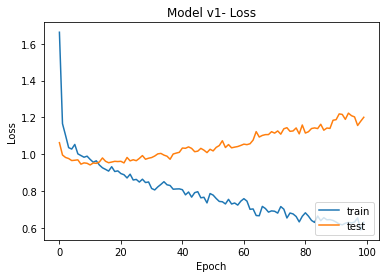

In [105]:
plt.plot(history_v1.history['loss'])
plt.plot(history_v1.history['val_loss'])

plt.title('Model v1- Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')

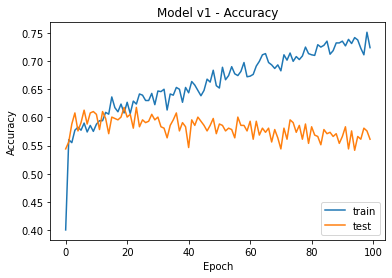

In [106]:
plt.plot(history_v1.history['accuracy'])
plt.plot(history_v1.history['val_accuracy'])

plt.title('Model v1 - Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')

The model is only good as the data.
The model is overfitting the training and the test set accuracy is not crossing 70%.

The quality of the features is poor. This is visible in the heatmap which is in the data preprocessing part of the notebook.